In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [67]:
df_na=pd.read_csv("../data/df_na_2.csv")

In [68]:
X_cluster_l_n=pd.read_csv("../data/no_spec_cluster_l_2.csv")
X_cluster_r_n=pd.read_csv("../data/no_spec_cluster_r_2.csv")
# X_cluster_s=pd.read_csv("../data/X_cluster_s.csv")

In [69]:
X_log_n =pd.read_csv("../data/no_spec_log_2.csv")
X_route_n =pd.read_csv("../data/no_spec_route_2.csv")
X_corred_n = pd.read_csv("../data/no_spec_corred_2.csv")

# 클러스터링 정리

In [70]:
len(X_corred_n), len(X_cluster_l_n), len(X_cluster_r_n)

(40788, 40788, 40788)

In [71]:
clusterer = KMeans(n_clusters=2, max_iter=500, random_state=0)
cluster_labels = clusterer.fit_predict(X_cluster_l_n)
X_cluster_l_n['cluster_label_l']=cluster_labels

clusterer = KMeans(n_clusters=2, max_iter=500, random_state=0)
cluster_labels2 = clusterer.fit_predict(X_cluster_r_n)
X_cluster_r_n['cluster_label_r']=cluster_labels2

# clusterer = KMeans(n_clusters=3, max_iter=500, random_state=0)
# cluster_labels3 = clusterer.fit_predict(X_cluster_s)
# X_cluster_s)['cluster_label_s']=cluster_labels3

# clusterer = KMeans(n_clusters=2, max_iter=500, random_state=0)
# cluster_labels4 = clusterer.fit_predict(X_cluster_rl)
# X_cluster_rl['cluster_label_rl']=cluster_labels4

In [72]:
cluster_labels

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

In [73]:
X_cluster_l_n['유저_번호']=df_na['유저_번호']
X_cluster_r_n['유저_번호']=df_na['유저_번호']
# X_cluster_s['유저_번호']=df_na['유저_번호']
# X_cluster_rl['유저_번호']=df_na['유저_번호']

In [74]:
cluster_df = pd.concat([df_na['유저_번호'], X_cluster_l_n['cluster_label_l'], 
                        X_cluster_r_n['cluster_label_r']], axis=1) # X_cluster_rl['cluster_label_rl']
cluster_df.to_csv("../data/cluster_df_no_spec.csv", index=False)
cluster_df

,유저_번호,cluster_label_l,cluster_label_r
0,21.0,1,0
1,62.0,1,1
2,94.0,1,1
3,153.0,0,1
4,230.0,0,1
...,...,...,...
40783,879576.0,1,1
40784,879629.0,1,1
40785,879644.0,1,1
40786,879653.0,1,1


In [75]:
cluster00=cluster_df[(cluster_df['cluster_label_l']==0)&(cluster_df['cluster_label_r']==0)]
cluster01=cluster_df[(cluster_df['cluster_label_l']==0)&(cluster_df['cluster_label_r']==1)]
cluster11=cluster_df[(cluster_df['cluster_label_l']==1)&(cluster_df['cluster_label_r']==1)]
cluster10=cluster_df[(cluster_df['cluster_label_l']==1)&(cluster_df['cluster_label_r']==0)]

# cluster20=cluster_df[(cluster_df['cluster_label_l']==2)&(cluster_df['cluster_label_r']==0)]
# cluster21=cluster_df[(cluster_df['cluster_label_l']==2)&(cluster_df['cluster_label_r']==1)]
# cluster02=cluster_df[(cluster_df['cluster_label_l']==0)&(cluster_df['cluster_label_r']==2)]
# cluster12=cluster_df[(cluster_df['cluster_label_l']==1)&(cluster_df['cluster_label_r']==2)]

In [76]:
len(cluster00), len(cluster01), len(cluster11), len(cluster10) #, len(cluster20), len(cluster21)

(3860, 12558, 16345, 8025)

In [170]:
#타겟 군집 확정 : 00 01 11 10

len(cluster00), len(cluster01), len(cluster11), len(cluster10)

(3860, 12558, 16345, 8025)

# PCA 정리

## 1. PCA var와 실제 var의 상관계수 비교

- [고유_일자] = [전체_이벤트, 앱_실행]
- [R] = [마지막_로그_일자]
- [방문일자비율] = [앱실행비율]
- [funnel_100] = [funnel_01, funnel_10]
- [세션당_한도조회_인트로_페이지_조회] = [세션당_본인인증완료]
- [UV] = [GUV]

#### c.f 0.8 이상 상관관계 나오던 컬럼 목록

    - ('고유_일자', '전체_이벤트') 0.8590380700988114
    - ('고유_일자', '앱_실행') 0.9340776041472824
    - ('마지막_로그_일자', 'R') -0.9234822161811861
    - ('앱_실행', '전체_이벤트') 0.8912959918438876
    - ('방문일자비율', '앱실행비율') 0.8841868915023686
    - ('funnel_01', 'funnel_100') 0.8599806355605302
    - ('funnel_10', 'funnel_100') 0.8091888579538411

- ['VGU', 'GVU', 'VUG', 'UGV', 'UVG'] 의 경우엔 원본 넘겨줄 때부터 없었던 컬럼

('pca_0', 'F') 0.8739298217417427
('pca_0', 'R') 0.913039522156053
('pca_0', '방문일자비율') 0.6548076746340765
('pca_0', '고유_일자') 0.6256264873919978
('pca_1', '세션당_한도조회_인트로_페이지_조회') 0.41651949224910156
('pca_1', '첫_로그_일자') -0.9280975313466109
('pca_1', '고유_일자') -0.614502200774805
('pca_2', 'F') -0.47163669889275744
('pca_2', 'R') 0.40742470129529545
('고유_일자', 'F') 0.6633715222573112
('고유_일자', 'R') 0.49286003244204585
('고유_일자', '방문일자비율') 0.5074878030332238
('방문일자비율', 'F') 0.6457255091233964
('방문일자비율', 'R') 0.49723618759559274
('세션당_한도조회_시작하기_버튼_클릭', '세션당_한도조회_인트로_페이지_조회') 0.7826567516219883
('세션당_대출관리_서비스_이용', '세션당_KCB_신용정보_조회') 0.5561062858202471
('R', 'F') 0.6075397764854603


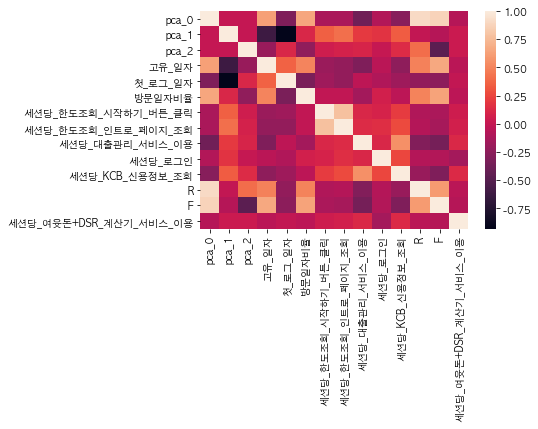

In [173]:
# log

pca = PCA(n_components=3)  # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(X_log_n)
# , columns=['principal component1', 'principal component2'])
principalDf=pd.DataFrame(printcipalComponents, columns=['pca_0', 'pca_1', 'pca_2'])
merge_df_l=pd.concat([principalDf, X_log_n], axis=1)
corr_df = merge_df_l.corr()
sns.heatmap(corr_df)

corr_cols = corr_df.columns
for i in range(len(corr_df)):
    for j in range(len(corr_df)-1, i, -1):
        if abs(corr_df.iloc[i].iloc[j]) > 0.4 and i != j:
            print((corr_cols[i], corr_cols[j]), corr_df.iloc[i].iloc[j])

('pca_0', 'funnel_100') 0.9295824702735922
('pca_0', 'funnel_10_hesitate_mean') 0.9039217156646909
('pca_1', 'GU') 0.8328634399327404
('pca_1', 'UG') 0.7884378281255746
('pca_2', 'VG') 0.6593918695565416
('pca_3', 'funnel_21') 0.5295216305026813
('pca_3', 'funnel_21_hesitate_sec_mean') 0.7519696968664894
('pca_4', 'UV') 0.4760142198573105
('pca_4', 'GV') -0.453308589060847
('UG', 'GU') 0.5419322479808214
('funnel_10_hesitate_mean', 'funnel_100') 0.7362306730403855
('funnel_21_hesitate_sec_mean', 'funnel_21') 0.4900393559098046
('funnel_32_hesitate_sec_mean', 'funnel_32') 0.7748891829954464


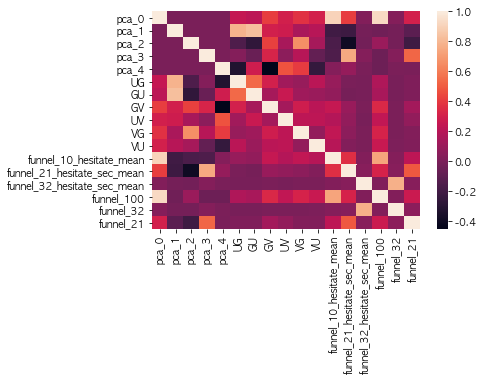

In [182]:
# route

pca = PCA(n_components=5)  # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(X_route_n)
# , columns=['principal component1', 'principal component2'])
principalDf=pd.DataFrame(printcipalComponents, columns=['pca_0', 'pca_1', 'pca_2', 'pca_3','pca_4'])
merge_df_r=pd.concat([principalDf, X_route_n], axis=1)
corr_df = merge_df_r.corr()
sns.heatmap(corr_df)

corr_cols = corr_df.columns
for i in range(len(corr_df)):
    for j in range(len(corr_df)-1, i, -1):
        if abs(corr_df.iloc[i].iloc[j]) > 0.45 and i != j:
            print((corr_cols[i], corr_cols[j]), corr_df.iloc[i].iloc[j])

### 2. 1에서 나온 상관계수를 바탕으로 클러스터에서 PCA 값의 분포에 대한 해석

- cluster00
- cluster01
- cluster10
- cluster11

In [126]:
cluster00

,유저_번호,cluster_label_l,cluster_label_r
20,594.0,0,0
23,645.0,0,0
32,798.0,0,0
43,1131.0,0,0
51,1273.0,0,0
...,...,...,...
40753,878792.0,0,0
40758,878867.0,0,0
40768,879162.0,0,0
40777,879383.0,0,0


## log 0, 1

- log 0

In [174]:
cluster_l0=X_cluster_l_n[X_cluster_l_n['cluster_label_l']==0]
cluster_l0

,0,1,2,cluster_label_l,유저_번호
3,-0.482293,-0.204514,0.267051,0,153.0
4,-0.482959,-0.175836,0.260507,0,230.0
5,-0.228859,0.155497,-0.008062,0,233.0
7,-0.213554,0.050517,-0.015042,0,276.0
8,-0.739189,-0.170902,0.044733,0,335.0
...,...,...,...,...,...
40773,-0.247714,0.077727,0.003242,0,879266.0
40777,-0.247413,0.017831,0.016483,0,879383.0
40778,-0.508919,-0.071007,-0.204822,0,879393.0
40782,-0.258722,-0.225312,0.020507,0,879550.0


In [175]:
cluster_l0.groupby(['cluster_label_l']).mean()

,0,1,2,유저_번호
cluster_label_l,,,,
0,-0.480397,0.013959,-0.020114,439565.650932


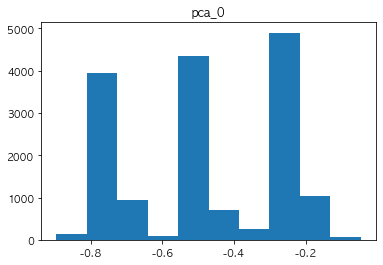

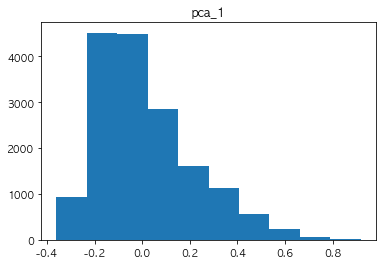

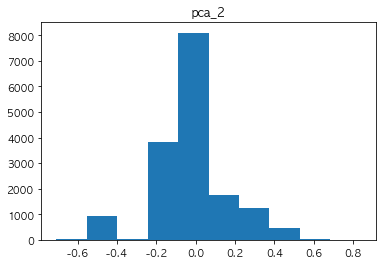

In [176]:
for i in range(3):
    plt.hist(cluster_l0[str(i)])
    plt.title("pca_" + str(i))
    plt.show()

- log 1

In [177]:
cluster_l1=X_cluster_l_n[X_cluster_l_n['cluster_label_l']==1]
cluster_l1

,0,1,2,cluster_label_l,유저_번호
0,0.029685,0.224162,-0.276521,1,21.0
1,0.030441,0.094701,0.209257,1,62.0
2,0.021815,0.204147,-0.273216,1,94.0
6,-0.012659,-0.234109,0.243516,1,252.0
9,-0.008806,-0.086288,0.238150,1,354.0
...,...,...,...,...,...
40781,0.781887,0.720132,-0.107809,1,879447.0
40783,0.487239,-0.333598,0.205665,1,879576.0
40784,0.509193,-0.375004,-0.296975,1,879629.0
40785,0.705549,-0.380405,-0.035964,1,879644.0


In [178]:
cluster_l1.groupby(['cluster_label_l']).mean()

,0,1,2,유저_번호
cluster_label_l,,,,
1,0.323642,-0.009404,0.013551,438936.01149


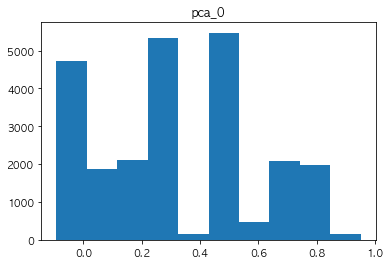

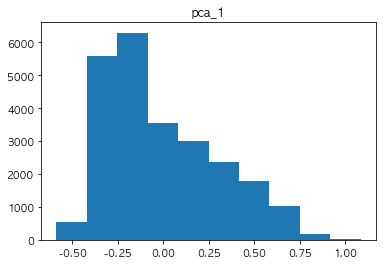

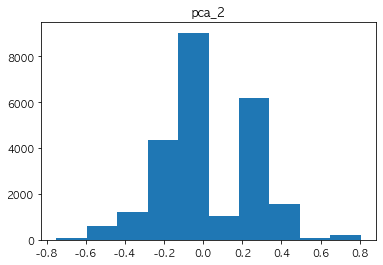

In [179]:
for i in range(3):
    plt.hist(cluster_l1[str(i)])
    plt.title("pca_" + str(i))
    plt.show()

## route 0,1

- route 0

In [183]:
cluster_r0 = X_cluster_r_n[X_cluster_r_n['cluster_label_r'] == 0]
cluster_r0

,0,1,2,3,4,cluster_label_r,유저_번호
0,0.351109,-0.054408,0.080074,-0.109345,0.183303,0,21.0
18,0.798861,-0.185706,-0.278648,0.867673,0.402633,0,579.0
20,0.469107,-0.275534,-0.005759,-0.189282,-0.088757,0,594.0
23,0.335913,-0.034753,-0.093278,-0.162843,0.186594,0,645.0
24,0.358169,0.253882,-0.268506,-0.194006,0.042895,0,681.0
...,...,...,...,...,...,...,...
40764,0.858816,-0.047635,-0.484784,0.572189,-0.063859,0,879117.0
40768,0.287577,-0.166382,-0.102682,-0.173012,-0.008246,0,879162.0
40777,0.571676,0.444859,0.345050,0.023177,0.205614,0,879383.0
40781,0.309845,-0.301870,0.179685,-0.095097,0.139819,0,879447.0


In [184]:
cluster_r0.groupby(['cluster_label_r']).mean()

,0,1,2,3,4,유저_번호
cluster_label_r,,,,,,
0,0.49536,-0.052568,-0.02716,-0.02219,0.002338,439080.495835


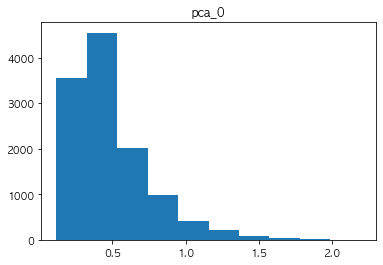

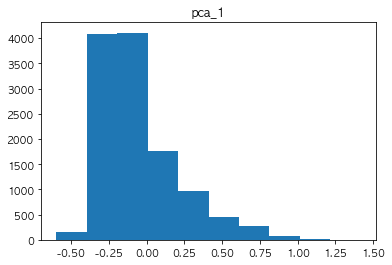

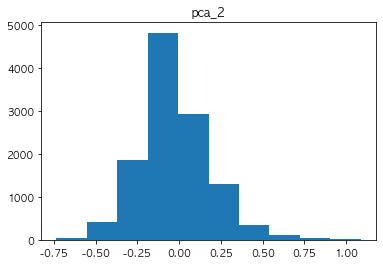

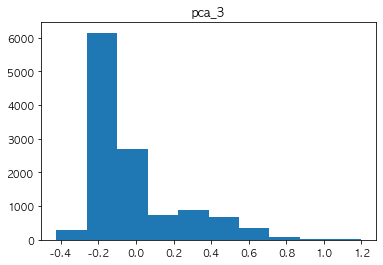

In [41]:
for i in range(4):
    plt.hist(cluster_r0[str(i)])
    plt.title("pca_" + str(i))
    plt.show()

- route 1

In [43]:
cluster_r1 = X_cluster_r_n[X_cluster_r_n['cluster_label_r'] == 1]
cluster_r1

,0,1,2,3,4,cluster_label_r
1,-0.232545,-0.029356,-0.013736,-0.006045,-0.009564,1
2,-0.246762,-0.105999,0.007766,-0.010589,0.040438,1
3,-0.220730,0.045263,-0.047856,-0.014254,0.031273,1
4,-0.247777,-0.125557,0.030254,0.004538,-0.062213,1
5,-0.221517,0.030092,-0.030413,-0.002521,-0.048349,1
...,...,...,...,...,...,...
40782,-0.221517,0.030092,-0.030413,-0.002521,-0.048349,1
40783,-0.247777,-0.125557,0.030254,0.004538,-0.062213,1
40784,-0.023928,0.442055,0.225886,0.062307,0.295805,1
40785,-0.200049,0.165680,-0.092412,-0.017437,0.025856,1


In [44]:
cluster_r1.groupby(['cluster_label_r']).mean()

,0,1,2,3,4
cluster_label_r,,,,,
1,-0.203694,0.021616,0.011168,0.009125,-0.000962


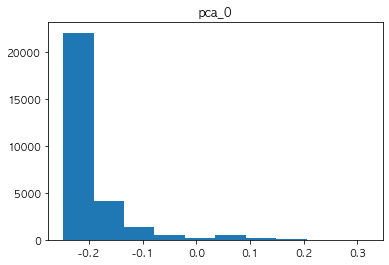

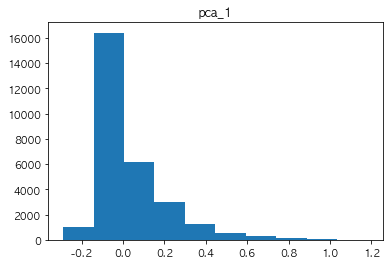

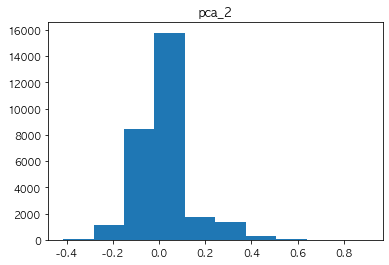

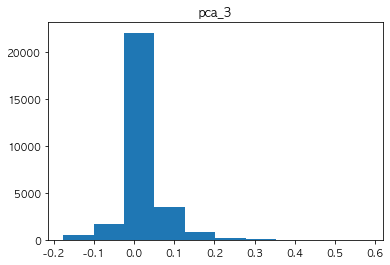

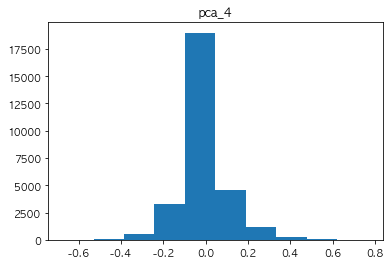

In [45]:
for i in range(5):
    plt.hist(cluster_r1[str(i)])
    plt.title("pca_" + str(i))
    plt.show()